# Solve Laplace equation by FEM
We use the discretization as in the FD problem

$$
\frac{\partial^2\phi(x,y)}{\partial x^2}+\frac{\partial^2\phi(x,y)}{\partial y^2}=0
$$

in the 4x4 square with the boundary conditions $u(x=0,y)=0$ and $u(x>2.0,y=0)=5$ and $u(x=3.0,y)=5$. In the lecture we calculated the element matrix of the unit triangle and tranformed back to the respective triangles in the simulation domain. We noticed that all rearranged element matrices had the same form, to read
$$
k_{e}=\frac{1}{2}\begin{pmatrix}1&-1&0\\-1&2&-1\\0&-1&1\end{pmatrix}
$$
Thus the only tasks left are inflating the matrix and setting up the r.h.s. of the linear equation system.

In [1]:
# Get the libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Set the Element matrix
ke=np.array([[1.0,-1.0,0],[-1.0,2.0,-1.0],[0,-1.0,1.0]])/2

# The element indices
ElementIndices=np.array([[9,13,14],[9,10,14],[10,14,15],[10,11,15],[11,15,16],[11,12,16],
                [5,9,10],[5,6,10],[6,10,11],[6,7,11],[7,11,12],[7,8,12],
                [1,5,6],[1,2,6],[2,6,7],[2,3,7],[3,7,8],[3,4,8]])-1 # Vorsicht von allen Indizes 1 abziehen
# The global matrix
Kg=np.zeros((16,16))
for e in ElementIndices:
    K=np.zeros((16,16))
    K[e[0],e]=ke[0]
    K[e[1],e]=ke[1]
    K[e[2],e]=ke[2]
    Kg+=K

In [3]:
# Set the rhs b of the linear system 
b=np.zeros(16)
b[[2,3,7,11,15]]=5
# and change the respective rows in Kg
Kg[[0,2,3,4,7,8,11,12,15]]=np.zeros(16)
Kg[[0,2,3,4,7,8,11,12,15],[0,2,3,4,7,8,11,12,15]]=1

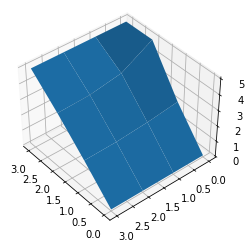

In [4]:
%matplotlib inline
# Solve the linear system
sol=np.linalg.solve(Kg,b).reshape(4,4)
# Set up grid and plot data
nx, ny = 4, 4
x = np.arange(nx)
y = np.arange(ny)
X,Y = np.meshgrid(x,y)
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
#
ha.plot_surface(X, Y, sol)
#ha.plot_surface(X.reshape(16), Y.reshape(16), sol.reshape(16))
#ha.plot_trisurf(X.reshape(16), Y.reshape(16), sol.reshape(16))
#for angle in range(0, 360, 36):
ha.view_init(40, 140)
    #plt.draw()
    #plt.pause(.5)
plt.show()